In [1]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [18]:
url = "https://www.amazon.in/s?k=iphone14&ref=nb_sb_noss"

In [19]:
headers = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36','Accept-Language': 'en-US,en;q=0.5'})

In [20]:
webpage = requests.get(url,headers=headers)

In [21]:
webpage

<Response [200]>

In [22]:
type(webpage.content)

bytes

In [23]:
soup = BeautifulSoup(webpage.content,"html.parser")

In [24]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--

In [25]:
links = soup.find_all("a",attrs = {'class' : 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [26]:
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Apple-iPhone-14-128GB-Starlight/dp/B0BDK8LKPJ/ref=sr_1_1?keywords=iphone14&amp;qid=1688840478&amp;sr=8-1" target="_blank"><span class="a-size-medium a-color-base a-text-normal">Apple iPhone 14 (128 GB) - Starlight</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Apple-iPhone-14-128GB-Blue/dp/B0BDK62PDX/ref=sr_1_2?keywords=iphone14&amp;qid=1688840478&amp;sr=8-2" target="_blank"><span class="a-size-medium a-color-base a-text-normal">Apple iPhone 14 (128 GB) - Blue</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Apple-iPhone-14-128GB-Purple/dp/B0BDJ213TX/ref=sr_1_3?keywords=iphone14&amp;qid=1688840478&amp;sr=8-3" target="_blank"><span class="a-size-medium a-color-base a-text-normal">Apple iPhone 14 (128 GB) - Purple</span> </a>,
 <a class="a-link-normal s-underline-t

In [27]:
links[1]

<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Apple-iPhone-14-128GB-Blue/dp/B0BDK62PDX/ref=sr_1_2?keywords=iphone14&amp;qid=1688840478&amp;sr=8-2" target="_blank"><span class="a-size-medium a-color-base a-text-normal">Apple iPhone 14 (128 GB) - Blue</span> </a>

In [28]:
links[1].get('href')

'/Apple-iPhone-14-128GB-Blue/dp/B0BDK62PDX/ref=sr_1_2?keywords=iphone14&qid=1688840478&sr=8-2'

In [29]:
link = links[1].get('href')

In [30]:
product_list = 'https://www.amazon.in' + link

In [31]:
product_list

'https://www.amazon.in/Apple-iPhone-14-128GB-Blue/dp/B0BDK62PDX/ref=sr_1_2?keywords=iphone14&qid=1688840478&sr=8-2'

In [32]:
new_webpage = requests.get(product_list,headers=headers)

In [33]:
new_webpage

<Response [200]>

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- 
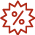
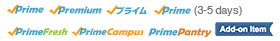

In [34]:
new_webpage.content

In [35]:
new_soup = BeautifulSoup(new_webpage.content,"html.parser")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--
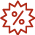
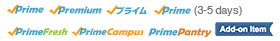

In [36]:
new_soup

In [39]:
new_soup.find("h1", attrs={"id" : "title"}).text.strip()

'Apple iPhone 14 (128 GB) - Blue'

In [41]:
new_soup.find("span", attrs={"class": 'a-price aok-align-center reinventPricePriceToPayMargin priceToPay'}).find("span", attrs={"class": 'a-offscreen'}).text.strip()

'₹70,999'

In [46]:
new_soup.find("span", attrs={"class" : 'a-icon-alt'}).text.strip()

'4.4 out of 5 stars'

In [116]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={"class": 'a-price aok-align-center reinventPricePriceToPayMargin priceToPay'}).find("span", attrs={"class": 'a-offscreen'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available

In [117]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.in/s?k=iphone14&ref=nb_sb_noss"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.in" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))

    
    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [118]:
amazon_df

,title,price,rating,reviews,availability
1,Apple iPhone 14 (128 GB) - Blue,"₹70,999",4.4 out of 5 stars,433 ratings,In stock
4,Apple iPhone 14 (256 GB) - Blue,"₹80,999",4.6 out of 5 stars,54 ratings,Only 1 left in stock
9,Apple iPhone 14 (256 GB) - (Product) RED,"₹80,999",4.3 out of 5 stars,25 ratings,In stock
12,Apple iPhone 14 Plus (128 GB) - Yellow,"₹79,999",4.5 out of 5 stars,875 ratings,In stock
15,Apple iPhone 14 Plus (256 GB) - Blue,"₹89,999",4.5 out of 5 stars,875 ratings,In stock
16,Apple iPhone 14 (128 GB) - Starlight,"₹70,999",4.4 out of 5 stars,289 ratings,In stock


In [102]:
amazon_df.head()

,title,price,rating,reviews,availability
3,Apple iPhone 14 (128 GB) - (Product) RED,"₹70,999",4.4 out of 5 stars,132 ratings,In stock
12,Apple iPhone 14 Plus (128 GB) - Yellow,"₹79,999",4.5 out of 5 stars,875 ratings,In stock
14,Apple iPhone 14 Plus (128 GB) - Midnight,"₹79,999",4.5 out of 5 stars,875 ratings,In stock
15,Apple iPhone 14 Plus (128 GB) - (Product) RED,"₹77,999",4.5 out of 5 stars,875 ratings,In stock


In [103]:
amazon_df.tail()

,title,price,rating,reviews,availability
3,Apple iPhone 14 (128 GB) - (Product) RED,"₹70,999",4.4 out of 5 stars,132 ratings,In stock
12,Apple iPhone 14 Plus (128 GB) - Yellow,"₹79,999",4.5 out of 5 stars,875 ratings,In stock
14,Apple iPhone 14 Plus (128 GB) - Midnight,"₹79,999",4.5 out of 5 stars,875 ratings,In stock
15,Apple iPhone 14 Plus (128 GB) - (Product) RED,"₹77,999",4.5 out of 5 stars,875 ratings,In stock


In [107]:
amazon_df

,title,price,rating,reviews,availability


In [119]:
d

{'title': ['',
  'Apple iPhone 14 (128 GB) - Blue',
  '',
  '',
  'Apple iPhone 14 (256 GB) - Blue',
  '',
  '',
  '',
  '',
  'Apple iPhone 14 (256 GB) - (Product) RED',
  '',
  '',
  'Apple iPhone 14 Plus (128 GB) - Yellow',
  '',
  '',
  'Apple iPhone 14 Plus (256 GB) - Blue',
  'Apple iPhone 14 (128 GB) - Starlight',
  '',
  '',
  '',
  ''],
 'price': ['',
  '₹70,999',
  '',
  '',
  '₹80,999',
  '',
  '',
  '',
  '',
  '₹80,999',
  '',
  '',
  '₹79,999',
  '',
  '',
  '₹89,999',
  '₹70,999',
  '',
  '',
  '',
  ''],
 'rating': ['',
  '4.4 out of 5 stars',
  '',
  '',
  '4.6 out of 5 stars',
  '',
  '',
  '',
  '',
  '4.3 out of 5 stars',
  '',
  '',
  '4.5 out of 5 stars',
  '',
  '',
  '4.5 out of 5 stars',
  '4.4 out of 5 stars',
  '',
  '',
  '',
  ''],
 'reviews': ['',
  '433 ratings',
  '',
  '',
  '54 ratings',
  '',
  '',
  '',
  '',
  '25 ratings',
  '',
  '',
  '875 ratings',
  '',
  '',
  '875 ratings',
  '289 ratings',
  '',
  '',
  '',
  ''],
 'availability': ['Not Avai